# 5. Performing Sentiment Analysis using Text Classification (Step 2 & 3)

## Dependencies

In [1]:
import pandas as pd
import numpy as np
#pd.set_option('display.max_rows', 50)
#pd.set_option('display.max_colwidth', 1000)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import pickle
import spacy
import re
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings 
from sklearn import exceptions
warnings.filterwarnings("ignore", category=exceptions.ConvergenceWarning) 

## Functions

In [2]:
#Takes the choosen values for hyperameter and a classifier as parameters 
#and perform a gridsearch with a scoring based on accuracy
def grid(param_grid,model,bow,Y):
    start = time.time()
    grid_clf = GridSearchCV(model, param_grid = param_grid, scoring = 'accuracy', n_jobs=2,verbose=4, cv=cv)
    grid_clf.fit(bow, y=Y) #ou sur train
    end = time.time()
    print("Best parameters = ", grid_clf.best_params_, " grid time : ", round((end - start)/60, 4))
    return(grid_clf.best_params_)

In [3]:
#Takes features and the target from 2 datasets with a pipeline as parameters 
#and perform the split, training and evaluation (step 2)
def train (pipeline,X0,Y0,X1,Y1):
    start = time.time()
    matrix = np.zeros((n,n))
    accuracy = 0
    run = 0
    for train_ix, test_ix in CV.split(X0, Y0):
        run+=1
        xtrain, xtest = X0[train_ix], X1[test_ix]
        ytrain, ytest = Y0[train_ix], Y1[test_ix]
        
        #Training
        pipeline.fit(xtrain,ytrain)
        
        # Predicting with a test set
        predicted = pipeline.predict(xtest)

        # Accuracy
        a = metrics.accuracy_score(ytest, predicted)
        print("Model Accuracy ",run," : ", a)
        accuracy = accuracy + a
        
        #Confusion matrix
        m = metrics.confusion_matrix(ytest, predicted)
        matrix = matrix + m
        
    end = time.time()
    print("fit time : ", round((end - start)/60, 4))
    return matrix,accuracy/cv

In [165]:
#Takes features and the target from 3 datasets with a pipeline as parameters and perform the split, training and evaluation (step 3)
def train_cross (pipeline,X0,Y0,X1,Y1,X2,Y2):
    start = time.time()
    matrix1 = np.zeros((n,n))
    matrix2 = np.zeros((n,n))
    accuracy1 = 0
    accuracy2 = 0
    run = 0
    for train_ix, test_ix in CV.split(X0, Y0):
        run+=1
        xtrain, x1test, x2test = X0[train_ix], X1[test_ix], X2[test_ix] #remplacer X1 et Y1 par X0 et Y0 pour tout faire sur le meme
        ytrain, y1test, y2test = Y0[train_ix], Y1[test_ix], Y2[test_ix]
        
        #Training
        pipeline.fit(xtrain,ytrain)
        
        # Predicting with a test set
        predicted1 = pipeline.predict(x1test)
        predicted2 = pipeline.predict(x2test)
        
        # Accuracy
        a1 = metrics.accuracy_score(y1test, predicted1)
        print("Model Accuracy ",run," : ", a1)
        accuracy1 = accuracy1 + a1
        
        a2 = metrics.accuracy_score(y2test, predicted2)
        print("Model Accuracy ",run," : ", a2)
        accuracy2 = accuracy2 + a2
        
        
        #Confusion matrix
        m1 = metrics.confusion_matrix(y1test, predicted1)
        matrix1 = matrix1 + m1
        
        m2 = metrics.confusion_matrix(y2test, predicted2)
        matrix2 = matrix2 + m2
        
    end = time.time()
    print("fit time : ", round((end - start)/60, 4))
    return matrix1,accuracy1/cv,matrix2,accuracy2/cv

In [4]:
#Takes the confusion matrix, accuracy and a name as parameters and plot the matrix with all information
def plot_matrix (matrix,accuracy,name):
    fig, ax = plt.subplots()
    fig.set_size_inches(9, 9)
    
    if n == 2:
        cmd = metrics.ConfusionMatrixDisplay(matrix, display_labels=["Positive","Negative"])
        ax.text(-0.8,2.1, "Accuracy = "+str(round(accuracy,4))+"\n"+legend+"\nFeatures = "+str(bow.shape[1])+ 
                                                                    "  Elements = "+str(bow.nnz),fontsize=16)
    
    else:
        cmd = metrics.ConfusionMatrixDisplay(matrix, display_labels=["1","2","3","4","5"])
        ax.text(-0.5,6, "Accuracy = "+str(round(accuracy,4))+"\n"+legend+"\nFeatures = "+str(bow.shape[1])+ 
                                                                    "  Elements = "+str(bow.nnz),fontsize=16)
        
    plt.rc('font', size=18);plt.rc('axes', titlesize=20);plt.rc('axes', labelsize=14);
                            plt.rc('xtick', labelsize=12);plt.rc('ytick', labelsize=12)
    cmd.plot(ax=ax,cmap="magma_r",values_format='g')
    ax.set_title(str(name),fontsize=22)
    plt.savefig("plot/"+data_name+" "+ name+"_matrix.png", bbox_inches="tight")

# Prediction with a shared dataset (step 2)

## Data

In [24]:
data0=pickle.load(open("french_to_english_film.dataset", "rb"))
data1=pickle.load(open("english_to_french_film.dataset", "rb"))

In [26]:
#Define sample number, fold number for the cross validation and features and target columns
n = len(data0['rating'].value_counts())
cv = 5
CV = StratifiedKFold(n_splits=cv, shuffle=True, random_state=1)
Xntrad=data0['translation']
Yntrad=data0['rating']
Xtrad=data1['review']
Ytrad=data1['rating']

## Vectorization, training and results

In [ ]:
#Create vector reprensenting the comment
vec = CountVectorizer(lowercase=True, ngram_range=(1, 2), max_df=0.90, min_df=5)
bow = vec.fit_transform(Xntrad)

data_name = "Crosslingual en translated model on en film bow"
legend = "No preprocessing. English \nVectorisation with Bow and n-grams=2"

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters =  {'alpha': 0.3}  grid time :  0.3145
Model Accuracy  1  :  0.79015625
Model Accuracy  2  :  0.7925625
Model Accuracy  3  :  0.7963125
Model Accuracy  4  :  0.7936875
Model Accuracy  5  :  0.791125
fit time :  2.6148


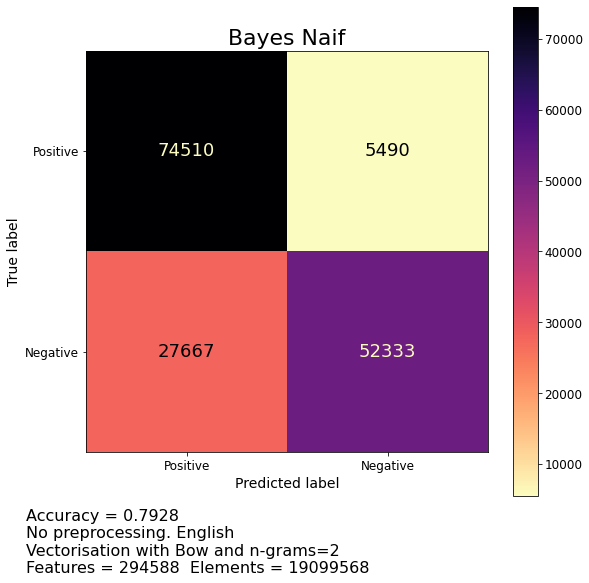

In [27]:
#Create classifier
name = "Bayes Naif"
clf = MultinomialNB()

#Run the gridsearch
param_grid = {'alpha':[0.1,0.3,0.7,1,2,3,4,5,7,10]}
param=grid(param_grid,clf,bow,Yntrad)

#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = MultinomialNB(**param) 
pipeline = Pipeline([('vec', vec), ('clf', clf)]) 
matrix,accuracy = train(pipeline,Xntrad,Yntrad,Xtrad,Ytrad)
plot_matrix(matrix,accuracy,name)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters =  {'C': 0.1}  grid time :  5.6857
Model Accuracy  1  :  0.85378125
Model Accuracy  2  :  0.85334375
Model Accuracy  3  :  0.8549375
Model Accuracy  4  :  0.85790625
Model Accuracy  5  :  0.85309375
fit time :  3.4446


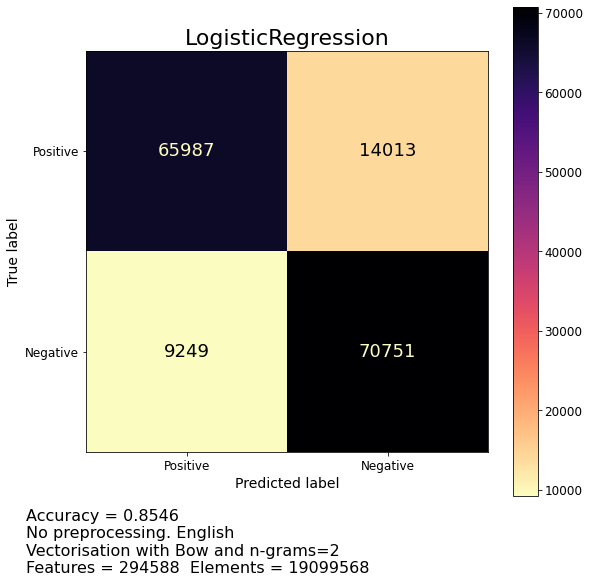

In [28]:
#Create classifier
name = "LogisticRegression"
clf = LogisticRegression()

#Run the gridsearch
param_grid = {'C':[0.01,0.05,0.1,0.5,1,5,10,50]}
param=grid(param_grid,clf,bow,Yntrad)

#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = LogisticRegression(**param) 
pipeline = Pipeline([('vec', vec), ('clf', clf)]) 
matrix,accuracy = train(pipeline,Xntrad,Yntrad,Xtrad,Ytrad)
plot_matrix(matrix,accuracy,name)

In [ ]:
#Create vector reprensenting the comment
vec = TfidfVectorizer(lowercase=True, ngram_range=(1, 2), max_df=0.90, min_df=5)
tfidf = vec.fit_transform(Xntrad)

data_name = "Crosslingual en translated model on en film tfidf"
legend = "No preprocessing. English \nVectorisation with Tfidf and n-grams=2"

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters =  {'alpha': 0.3}  grid time :  0.2676
Model Accuracy  1  :  0.806
Model Accuracy  2  :  0.806875
Model Accuracy  3  :  0.81284375
Model Accuracy  4  :  0.808625
Model Accuracy  5  :  0.80734375
fit time :  2.6569


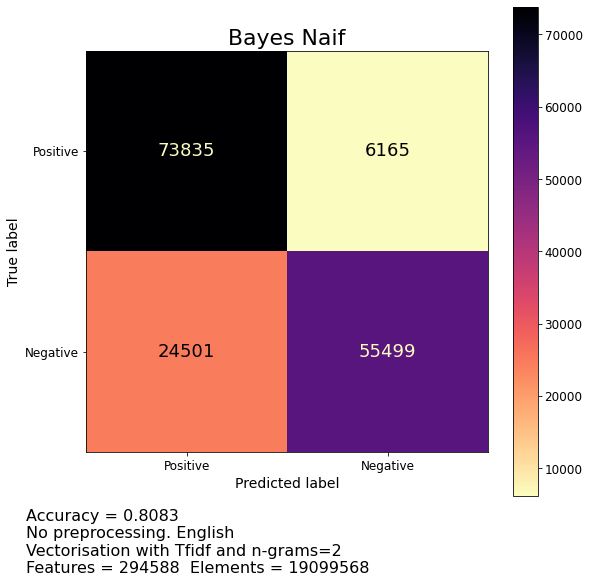

In [29]:
#Create classifier
name = "Bayes Naif"
clf = MultinomialNB()

#Run the gridsearch
param_grid = {'alpha':[0.1,0.3,0.7,1,2,3,4,5,7,10]}
param=grid(param_grid,clf,tfidf,Yntrad)

#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = MultinomialNB(**param) 
pipeline = Pipeline([('vec', vec), ('clf', clf)]) 
matrix,accuracy = train(pipeline,Xntrad,Yntrad,Xtrad,Ytrad)
plot_matrix(matrix,accuracy,name)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters =  {'C': 0.1}  grid time :  5.2917
Model Accuracy  1  :  0.82321875
Model Accuracy  2  :  0.82234375
Model Accuracy  3  :  0.8264375
Model Accuracy  4  :  0.8238125
Model Accuracy  5  :  0.81975
fit time :  3.2403


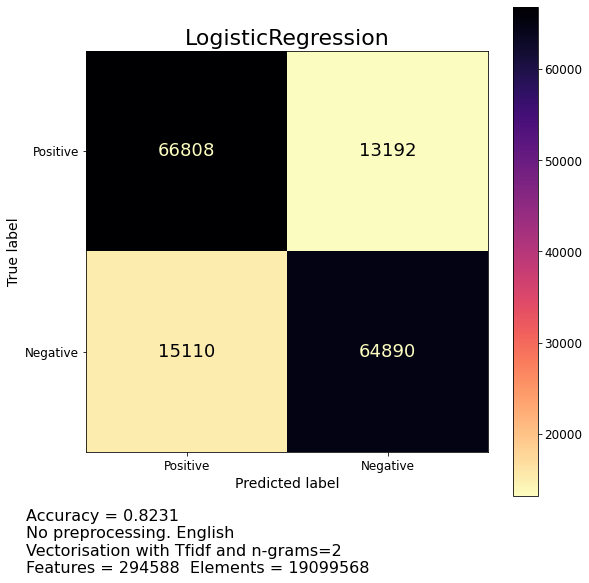

In [30]:
#Create classifier
name = "LogisticRegression"
clf = LogisticRegression()

#Run the gridsearch
param_grid = {'C':[0.01,0.05,0.1,0.5,1,5,10,50]}
param=grid(param_grid,clf,tfidf,Yntrad)

#Train de classifier with the best parameters then show accuracy and plot confusion matrix
clf = LogisticRegression(**param) 
pipeline = Pipeline([('vec', vec), ('clf', clf)]) 
matrix,accuracy = train(pipeline,Xntrad,Yntrad,Xtrad,Ytrad)
plot_matrix(matrix,accuracy,name)

# Prediction with a more neutral dataset but not fit for the type of data (movies or products) (step 3)

## Data

In [160]:
data1=pickle.load(open("english_to_french_film.dataset", "rb"))
data2=pickle.load(open("english_to_french_product.dataset", "rb"))
data3=pickle.load(open("french_to_english_product.dataset", "rb"))

In [161]:
#Set on True if the first dataset used for training (data1) is composed of movie rating (False if it is product rating)
movie = True
if movie:
    data2['rating'] = data2['rating'].str.replace("2", "1")
    data2['rating'] = data2['rating'].str.replace("4", "5")
    data2 = data2[data2.rating != "3"]
    data2=data2.reset_index(drop=True)
    data2['rating'] = data2['rating'].str.replace("1", "0")
    data2['rating'] = data2['rating'].str.replace("5", "1")

    data3['rating'] = data3['rating'].str.replace("2", "1")
    data3['rating'] = data3['rating'].str.replace("4", "5")
    data3 = data3[data3.rating != "3"]
    data3=data3.reset_index(drop=True)
    data3['rating'] = data3['rating'].str.replace("1", "0")
    data3['rating'] = data3['rating'].str.replace("5", "1")
else:
    data1['rating'] = data1['rating'].str.replace("2", "1")
    data1['rating'] = data1['rating'].str.replace("4", "5")
    data1 = data1[data1.rating != "3"]
    data1=data1.reset_index(drop=True)
    data1['rating'] = data1['rating'].str.replace("1", "0")
    data1['rating'] = data1['rating'].str.replace("5", "1")

In [163]:
#Define sample number, fold number for the cross validation and features and target columns
n = len(data1['rating'].value_counts())
cv = 5
CV = StratifiedKFold(n_splits=cv, shuffle=True, random_state=1)
Xntrad=data1['translation']
Yntrad=data1['rating']
X2=data2['translation']
Y2=data2['rating']
X3=data3['review']
Y3=data3['rating']

## Vectorization, training and results

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters =  {'alpha': 0.7}  grid time :  0.4391
Model Accuracy  1  :  0.74203125
Model Accuracy  1  :  0.74959375
Model Accuracy  2  :  0.74015625
Model Accuracy  2  :  0.74765625
Model Accuracy  3  :  0.74353125
Model Accuracy  3  :  0.7505625
Model Accuracy  4  :  0.73771875
Model Accuracy  4  :  0.75171875
Model Accuracy  5  :  0.74421875
Model Accuracy  5  :  0.7503125
fit time :  3.9059


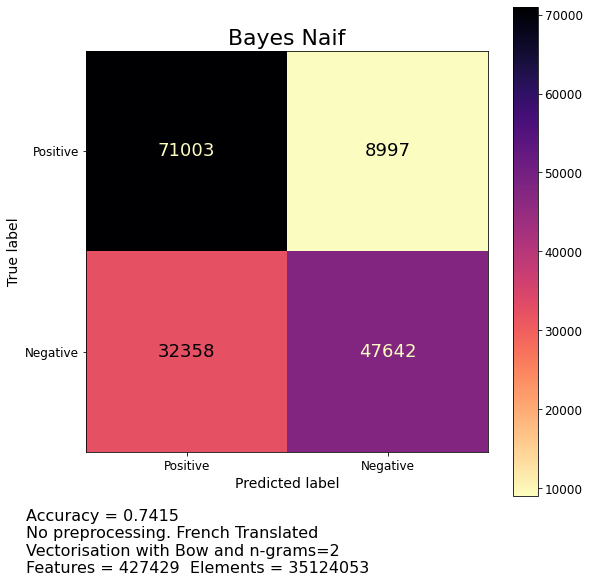

In [166]:
#Create vector reprensenting the comment
vec = CountVectorizer(lowercase=True, ngram_range=(1, 2), max_df=0.90, min_df=5)
bow = vec.fit_transform(Xntrad)

data_name = "Crosslingual neutral fr_product_trad on translated film model bow"
legend = "No preprocessing. French Translated \nVectorisation with Bow and n-grams=2"

#Create classifier
name = "Bayes Naif"
clf = MultinomialNB()

#Run the gridsearch
param_grid = {'alpha':[0.1,0.3,0.7,1,2,3,4,5,7,10]}
param=grid(param_grid,clf,bow,Yntrad)

#Train de classifier with the best parameters then show accuracies and plot confusion matrices
clf = MultinomialNB(**param)  
pipeline = Pipeline([('vec', vec), ('clf', clf)]) 
matrix1,accuracy1,matrix2,accuracy2 = train_cross(pipeline,Xntrad,Yntrad,X2,Y2,X3,Y3)
plot_matrix(matrix1,accuracy1,name)

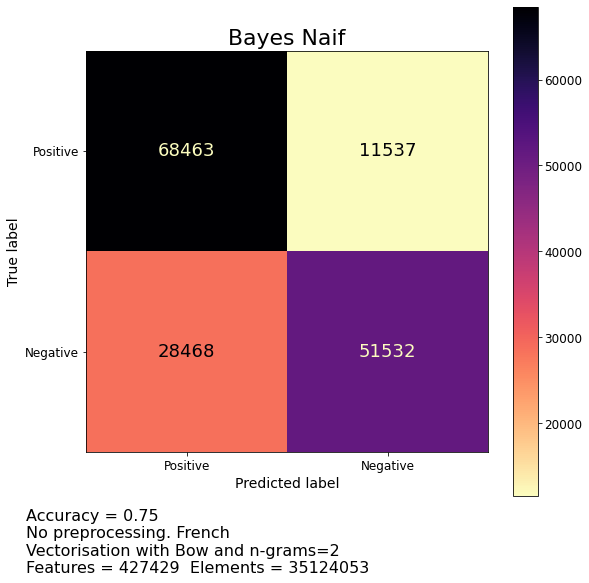

In [167]:
#Change names
data_name = "Crosslingual neutral fr_product_review on translated film model bow"
legend = "No preprocessing. French \nVectorisation with Bow and n-grams=2"

#Plot the second matrix
plot_matrix(matrix2,accuracy2,name)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters =  {'C': 0.05}  grid time :  11.0274
Model Accuracy  1  :  0.76871875
Model Accuracy  1  :  0.76046875
Model Accuracy  2  :  0.759625
Model Accuracy  2  :  0.75725
Model Accuracy  3  :  0.7651875
Model Accuracy  3  :  0.7560625
Model Accuracy  4  :  0.76025
Model Accuracy  4  :  0.7606875
Model Accuracy  5  :  0.76765625
Model Accuracy  5  :  0.7578125
fit time :  5.5011


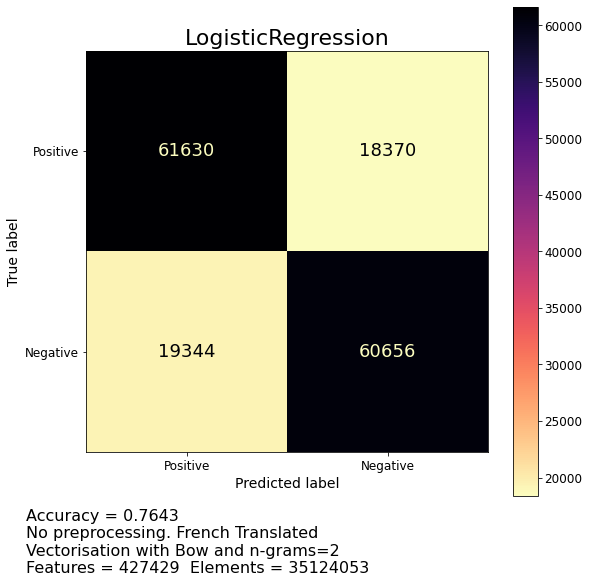

In [168]:
#Create vector reprensenting the comment
vec = CountVectorizer(lowercase=True, ngram_range=(1, 2), max_df=0.90, min_df=5)
bow = vec.fit_transform(Xntrad)

data_name = "Crosslingual neutral fr_product_trad on translated film model bow"
legend = "No preprocessing. French Translated \nVectorisation with Bow and n-grams=2"

#Create classifier
name = "LogisticRegression"
clf = LogisticRegression()

#Run the gridsearch
param_grid = {'C':[0.01,0.05,0.1,0.5,1,5,10,50]}
param=grid(param_grid,clf,bow,Yntrad)

#Train de classifier with the best parameters then show accuracies and plot confusion matrices
clf = LogisticRegression(**param) 
pipeline = Pipeline([('vec', vec), ('clf', clf)]) 
matrix1,accuracy1,matrix2,accuracy2 = train_cross(pipeline,Xntrad,Yntrad,X2,Y2,X3,Y3)
plot_matrix(matrix1,accuracy1,name)

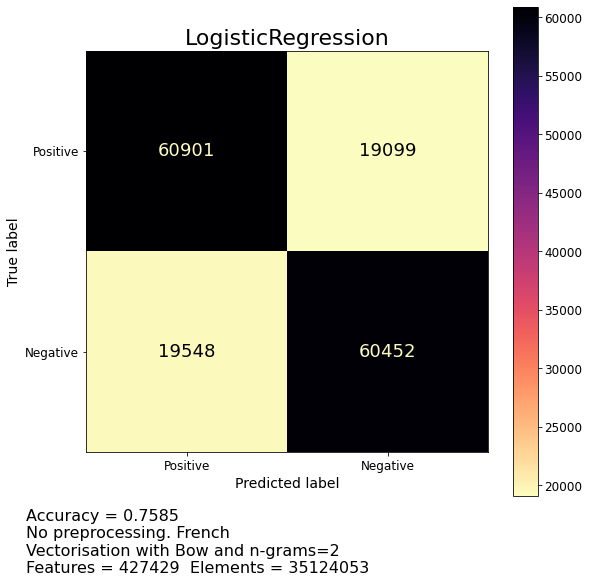

In [169]:
#Change names
data_name = "Crosslingual neutral fr_product_review on translated film model bow"
legend = "No preprocessing. French \nVectorisation with Bow and n-grams=2"

#plot second matrix
plot_matrix(matrix2,accuracy2,name)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters =  {'alpha': 0.7}  grid time :  0.408
Model Accuracy  1  :  0.74234375
Model Accuracy  1  :  0.74634375
Model Accuracy  2  :  0.7405
Model Accuracy  2  :  0.74659375
Model Accuracy  3  :  0.74434375
Model Accuracy  3  :  0.747125
Model Accuracy  4  :  0.74140625
Model Accuracy  4  :  0.746625
Model Accuracy  5  :  0.7454375
Model Accuracy  5  :  0.7458125
fit time :  3.6011


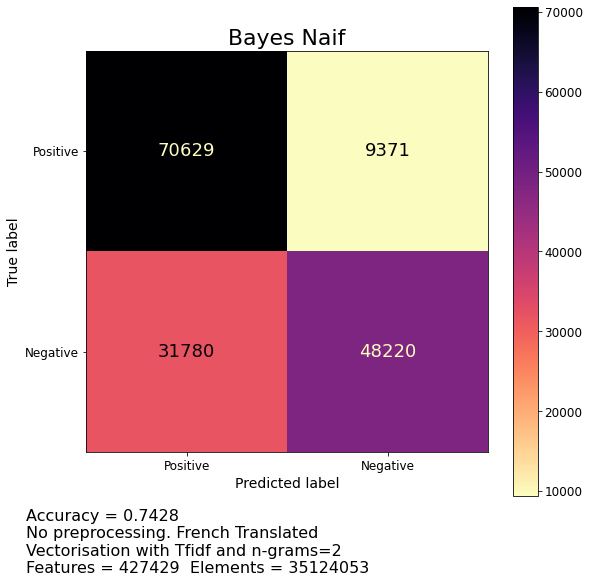

In [170]:
#Create vector reprensenting the comment
vec = TfidfVectorizer(lowercase=True, ngram_range=(1, 2), max_df=0.90, min_df=5)
tfidf = vec.fit_transform(Xntrad)

data_name = "Crosslingual neutral fr_product_trad on translated film model tfidf"
legend = "No preprocessing. French Translated \nVectorisation with Tfidf and n-grams=2"

#Create classifier
name = "Bayes Naif"
clf = MultinomialNB()

#Run the gridsearch
param_grid = {'alpha':[0.1,0.3,0.7,1,2,3,4,5,7,10]}
param=grid(param_grid,clf,tfidf,Yntrad)

#Train de classifier with the best parameters then show accuracies and plot confusion matrices
clf = MultinomialNB(**param)  
pipeline = Pipeline([('vec', vec), ('clf', clf)]) 
matrix1,accuracy1,matrix2,accuracy2 = train_cross(pipeline,Xntrad,Yntrad,X2,Y2,X3,Y3)
plot_matrix(matrix1,accuracy1,name)

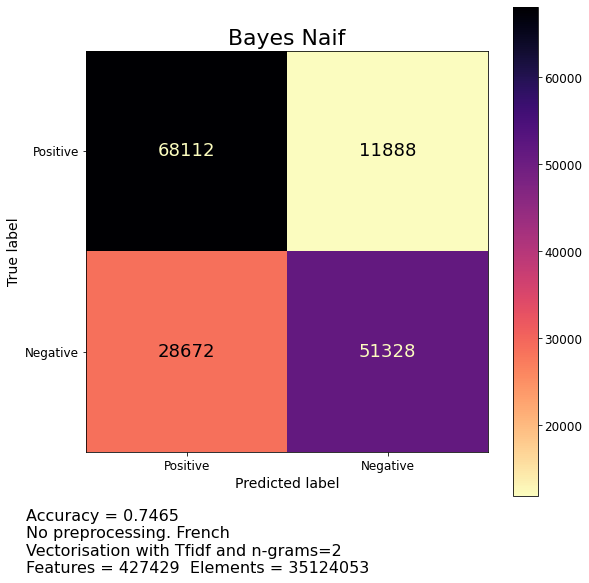

In [171]:
#Change names
data_name = "Crosslingual neutral fr_product_review on translated film model tfidf"
legend = "No preprocessing. French \nVectorisation with Tfidf and n-grams=2"

#Show second matrix
plot_matrix(matrix2,accuracy2,name)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters =  {'C': 10}  grid time :  5.2272
Model Accuracy  1  :  0.7721875
Model Accuracy  1  :  0.76909375
Model Accuracy  2  :  0.76590625
Model Accuracy  2  :  0.764125
Model Accuracy  3  :  0.76496875
Model Accuracy  3  :  0.75878125
Model Accuracy  4  :  0.76946875
Model Accuracy  4  :  0.76871875
Model Accuracy  5  :  0.7714375
Model Accuracy  5  :  0.763625
fit time :  4.8637


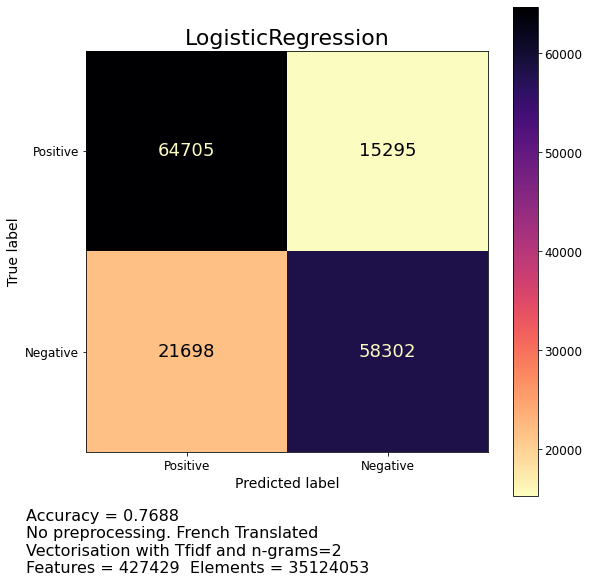

In [172]:
#Create vector reprensenting the comment
vec = CountVectorizer(lowercase=True, ngram_range=(1, 2), max_df=0.90, min_df=5)
tfidf = vec.fit_transform(Xntrad)

data_name = "Crosslingual neutral fr_product_trad on translated film model tfidf"
legend = "No preprocessing. French Translated \nVectorisation with Tfidf and n-grams=2"

#Create classifier
name = "LogisticRegression"
clf = LogisticRegression()

#Run the gridsearch
param_grid = {'C':[0.01,0.05,0.1,0.5,1,5,10,50]}
param=grid(param_grid,clf,tfidf,Yntrad)

#Train de classifier with the best parameters then show accuracies and plot confusion matrices
clf = LogisticRegression(**param)
pipeline = Pipeline([('vec', vec), ('clf', clf)]) 
matrix1,accuracy1,matrix2,accuracy2 = train_cross(pipeline,Xntrad,Yntrad,X2,Y2,X3,Y3)
plot_matrix(matrix1,accuracy1,name)

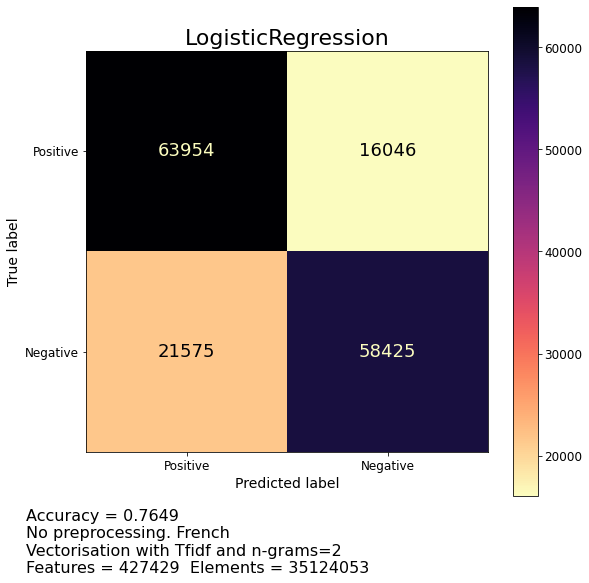

In [173]:
#Change names
data_name = "Crosslingual neutral fr_product_review on translated film model tfidf"
legend = "No preprocessing. French \nVectorisation with Tfidf and n-grams=2"

#Show second matrix
plot_matrix(matrix2,accuracy2,name)